In [200]:
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from random import randint
import warnings
warnings.filterwarnings("ignore")

with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)
with open('mlb.pkl', 'rb') as mlb_file:
    mlb = pickle.load(mlb_file)

with open('random_forest_classifier.pkl', 'rb') as classifier_file:
    rf_classifier = pickle.load(classifier_file)
    
data=pd.read_csv('out.csv',low_memory=False)



In [201]:
data=pd.read_excel('m1.xlsx')

In [202]:
data['title']

0                                                   Leo
1                              The Shawshank Redemption
2                                         The Godfather
3                                       The Dark Knight
4                                 The Godfather Part II
5                                          12 Angry Men
6                                      Schindler's List
7         The Lord of the Rings: The Return of the King
8                                          Pulp Fiction
9     The Lord of the Rings: The Fellowship of the Ring
10                                    Anatomy of a Fall
Name: title, dtype: object

In [203]:
full_text=str(data['title'])
dec=str(data['desc'])

In [204]:
input_text=full_text+'_'+dec
input_text=[input_text]
input_vector = tfidf_vectorizer.transform(input_text).toarray()
predicted_probabilities = rf_classifier.predict_proba(input_vector)

In [205]:
new=list()
for i in range(len(predicted_probabilities)):
    new.append(1-predicted_probabilities[i][0][0])
new

[0.24,
 0.07999999999999996,
 0.020000000000000018,
 0.0,
 0.0,
 0.0,
 0.18000000000000005,
 0.16000000000000003,
 0.06999999999999995,
 0.63,
 0.0,
 0.010000000000000009,
 0.0,
 0.0,
 0.07999999999999996,
 0.020000000000000018,
 0.0,
 0.030000000000000027,
 0.06000000000000005,
 0.0,
 0.0,
 0.0,
 0.08999999999999997,
 0.020000000000000018,
 0.0,
 0.0,
 0.0,
 0.0,
 0.15000000000000002,
 0.0,
 0.17000000000000004,
 0.030000000000000027]

In [206]:
confusion=[]

In [207]:
confusion=pd.DataFrame({'label':mlb.classes_})
confusion['positive_weight']=new
confusion

,label,positive_weight
0,Action,0.24
1,Adventure,0.08
2,Animation,0.02
3,Aniplex,0.00
4,BROSTA TV,0.00
5,Carousel Productions,0.00
6,Comedy,0.18
7,Crime,0.16
8,Documentary,0.07
9,Drama,0.63


In [208]:
import numpy as np
lkt=list()
for i in range(10,51,1):
    print(i)
    treshold=i/100
    pred=list()
    lkt.append(treshold)
    for i in new:
        if i >= treshold:
            pred.append(1)
        else:
            pred.append(0)
        l=np.array([pred])
       
    #print(pred,treshold)
    confusion[treshold]=pred
    predicted_labels_text = mlb.inverse_transform(l)
    #print(predicted_labels_text)

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [209]:
confusion

,label,positive_weight,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,...,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5
0,Action,0.24,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Adventure,0.08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Animation,0.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aniplex,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BROSTA TV,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Carousel Productions,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Comedy,0.18,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,Crime,0.16,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,Documentary,0.07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Drama,0.63,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [210]:
data
genre_string = data['genre'][0]
genre_list = ast.literal_eval(genre_string)
y_test = mlb.transform([genre_list])

In [211]:
y_test[0]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [212]:
confusion['actual']=y_test[0]
a=confusion['actual']
tp=0
tn=0
fp=0
fn=0
rc1=0

In [316]:
confusion[.25],confusion['actual']

(0     0
 1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     1
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 16    0
 17    0
 18    0
 19    0
 20    0
 21    0
 22    0
 23    0
 24    0
 25    0
 26    0
 27    0
 28    0
 29    0
 30    0
 31    0
 Name: 0.25, dtype: int64,
 0     1
 1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     1
 8     0
 9     1
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 16    0
 17    0
 18    0
 19    0
 20    0
 21    0
 22    0
 23    0
 24    0
 25    0
 26    0
 27    0
 28    0
 29    0
 30    0
 31    0
 Name: actual, dtype: int64)

In [320]:
label=[]
for i in range(len(confusion['label'])):
    label.append(i)
print(label)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [331]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

recall = recall_score(confusion['actual'], confusion[.2],labels=label, average='micro' )
precision = precision_score(confusion['actual'], confusion[.2],labels=label, average='micro')

In [332]:
print(recall)
precision

0.96875


0.96875

In [294]:
tpl=[]
tnl=[]
fpl=[]
fnl=[]
no=[]
for i in [.3]: 
    print(i)
    b=confusion[i]
    tp=0
    tn=0
    fp=0
    fn=0
    n=0
    for i in range(len(a)):
        if a[i]==1 &b[i]==1:
            print()
            tp+=1
        elif a[i]==0 &b[i]==0:
            tn+=1
        elif a[i]==0 & b[i]==1:
            fp+=1

        else :
            fn+=1
        
    tpl.append(tp)
    tnl.append(tn)
    fpl.append(fp)
    fnl.append(fn)
    no.append(n)
    

0.3



In [300]:
fpl

[0]

In [281]:
tpl,fnl,fpl


([3,
  3,
  3,
  3,
  3,
  3,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0])

In [282]:
rc1=[]
len(rc1)

0

In [283]:
len(fpl)

41

In [284]:
recall = []
for i in range(len(tpl)):
    rc1.append(tpl[i]+fnl[i])
    if rc1[i]!=0 :
        
        recall.append(tpl[i] / rc1[i])
    else:
        recall.append(0)

In [285]:
len(recall)

41

In [286]:
pr1=[]
prec = []
for i in range(len(tpl)):
    pr1.append(tpl[i]+fpl[i])
    if tpl[i]!=0 :
        prec.append(tpl[i] / pr1[i])
    else:
        prec.append(0)

In [287]:
prec


[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

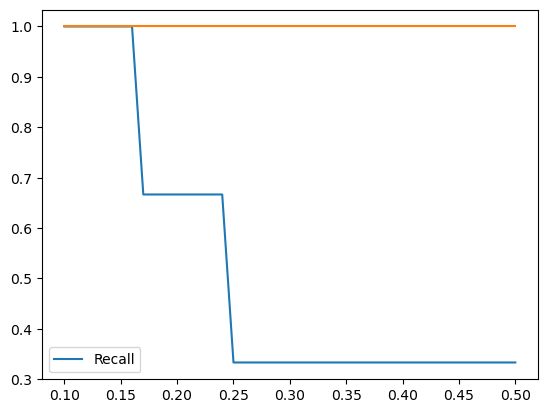

In [290]:
import matplotlib.pyplot as plt
plt.plot(lkt, recall,label='Recall')
plt.plot(lkt,prec)
plt.legend()
plt.show()